In [1]:
!nvidia-smi

Thu Aug  5 05:46:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`

%cd /content/drive/MyDrive/Tensorflow_Practice/Transfer_Learning
# !mkdir HW13     # I HAVE MADE IT.

Mounted at /content/drive
/content/drive/MyDrive/Tensorflow_Practice/Transfer_Learning


In [3]:
import numpy as np 
import cv2 
import PIL.Image as Image 
import os 
import matplotlib.pylab as plt 
import tensorflow as tf 
import tensorflow_hub as hub 
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

In [4]:
# m = tf.keras.Sequential([
#     hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", output_shape=[1001])
# ])
# m.build([None, 224, 224, 3])  # Batch input shape.


In [5]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [6]:
IMAGE_SHAPE+(3,) # important step about input shape

(224, 224, 3)

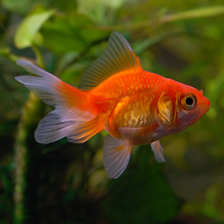

In [7]:
 gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish


In [8]:
gold_fish = np.array(gold_fish)/255.0
print(gold_fish.shape)
print(gold_fish[0][0][0]) # to prove that three dimensional array and scaling number

(224, 224, 3)
0.2823529411764706


In [9]:
gold_fish[np.newaxis, :].shape # add one more dimension 

(1, 224, 224, 3)

In [10]:
result = classifier.predict(gold_fish[np.newaxis, :])
result.shape

(1, 1001)

In [11]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [12]:
F = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
F

16384/10484 [==============================================] - 0s 0us/step


'/root/.keras/datasets/ImageNetLabels.txt'

In [13]:
image_labels = []
with open('/root/.keras/datasets/ImageNetLabels.txt', "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

# Load flowers dataset


In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [15]:
data_dir

'./datasets/flower_photos'

# Need to figure how it works

In [16]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/2608937632_cfd93bc7cd.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8915661673_9a1cdc3755_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8740218495_23858355d8_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4510350093_3700064215.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3539077354_c67aa7168d_m.jpg')]

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [18]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('datasets/flower_photos/roses/7551637034_55ae047756_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg')]

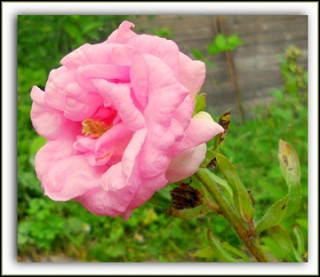

In [19]:
Image.open(str(roses[1]))

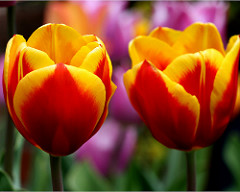

In [20]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(tulips[0])
# Image.open(str(tulips[0]))

In [21]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

# Remember how useful dictionary is

In [22]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

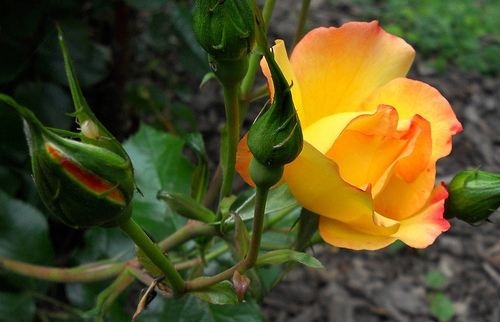

In [23]:
Image.open(str(flowers_images_dict['roses'][0]))

In [24]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
print(flowers_images_dict['roses'][0])
img.shape

datasets/flower_photos/roses/7345657862_689366e79a.jpg


(322, 500, 3)

In [25]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [26]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [27]:
X = np.array(X)
y = np.array(y)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
# Preprocessing: scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

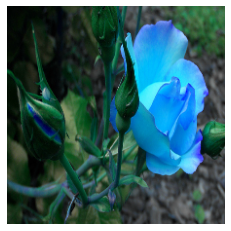

In [30]:
plt.axis('off')
plt.imshow(X[0])

In [31]:
print(X[0].shape)
print(IMAGE_SHAPE+(3,))

(224, 224, 3)
(224, 224, 3)


In [32]:
print(type(X[0]), X[0].shape)
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)
print(type(x0_resized))
if IMAGE_SHAPE+(3,) == X[0].shape:
  print("Yes")
if IMAGE_SHAPE+(3,) == x0_resized.shape:
  print("Yes")

print(type(X[0]))
print("Change")
print(type(np.array(X[0])))

<class 'numpy.ndarray'> (224, 224, 3)
<class 'numpy.ndarray'>
Yes
Yes
<class 'numpy.ndarray'>
Change
<class 'numpy.ndarray'>


In [33]:
predicted = classifier.predict(np.array([X[0], X[1], X[2]])) # predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 550, 722])

In [34]:
for index in predicted:
  print("Predicted: ", image_labels[index])

Predicted:  shower curtain
Predicted:  envelope
Predicted:  pillow


# Using pretrained model and retrain it using flower images

In [35]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


In [36]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers, activation='softmax')
])

model.summary()

model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/5
92/92 [==============================] - 13s 88ms/step - loss: 0.7886 - acc: 0.7176
Epoch 2/5
92/92 [==============================] - 8s 84ms/step - loss: 0.4017 - acc: 0.8668
Epoch 3/5
92/92 [==============================] - 8s 83ms/step - loss: 0.3089 - acc: 0.9046
Epoch 4/5
92/92 [==============================] - 8s 83ms/step - loss: 0.2606 - acc: 0.9152
Epoch 5/5
92/92 [==============================] - 8s 83ms/step - loss: 0.2214 - acc: 0.9356


In [37]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 3s 110ms/step - loss: 0.3896 - acc: 0.8651


[0.3895708918571472, 0.8651226162910461]